<a href="https://colab.research.google.com/github/taliahtarik/dsprojectjterm/blob/main/equityanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv('/root/Merged_Hospital_Data.csv')

print("Initial Dataset Preview:")
print(df.head())

Initial Dataset Preview:
   Facility.ID                  Facility.Name.x State.x       Measure.Name  \
0        10001  SOUTHEAST HEALTH MEDICAL CENTER      AL  READM-30-AMI-HRRP   
1        10001  SOUTHEAST HEALTH MEDICAL CENTER      AL  READM-30-AMI-HRRP   
2        10001  SOUTHEAST HEALTH MEDICAL CENTER      AL  READM-30-AMI-HRRP   
3        10001  SOUTHEAST HEALTH MEDICAL CENTER      AL  READM-30-AMI-HRRP   
4        10001  SOUTHEAST HEALTH MEDICAL CENTER      AL  READM-30-AMI-HRRP   

   Number.of.Discharges  Footnote.x  Excess.Readmission.Ratio  \
0                 274.0         NaN                    0.9332   
1                 274.0         NaN                    0.9332   
2                 274.0         NaN                    0.9332   
3                 274.0         NaN                    0.9332   
4                 274.0         NaN                    0.9332   

   Predicted.Readmission.Rate  Expected.Readmission.Rate  \
0                     12.9044                    13.828

In [ ]:
relevant_columns = ['Score', 'Predicted.Readmission.Rate', 'Expected.Readmission.Rate', 'Excess.Readmission.Ratio']
df_cleaned = df[relevant_columns].dropna()

df_cleaned['Score'] = pd.to_numeric(df_cleaned['Score'], errors='coerce')
df_cleaned['Score_Binary'] = df_cleaned['Score'].apply(lambda x: 1 if x > 3 else 0)

X = df_cleaned[['Predicted.Readmission.Rate', 'Expected.Readmission.Rate', 'Excess.Readmission.Ratio']]
y = df_cleaned['Score_Binary']

model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X, y)

y_pred = model.predict(X)

conf_matrix = confusion_matrix(y, y_pred)
class_report = classification_report(y, y_pred)

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[192969      0]
 [ 10351      0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    192969
           1       0.00      0.00      0.00     10351

    accuracy                           0.95    203320
   macro avg       0.47      0.50      0.49    203320
weighted avg       0.90      0.95      0.92    203320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Feature Importances:
Predicted.Readmission.Rate    0.338162
Expected.Readmission.Rate     0.340556
Excess.Readmission.Ratio      0.321282
dtype: float64


<ipython-input-3-f82f9dad1443>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


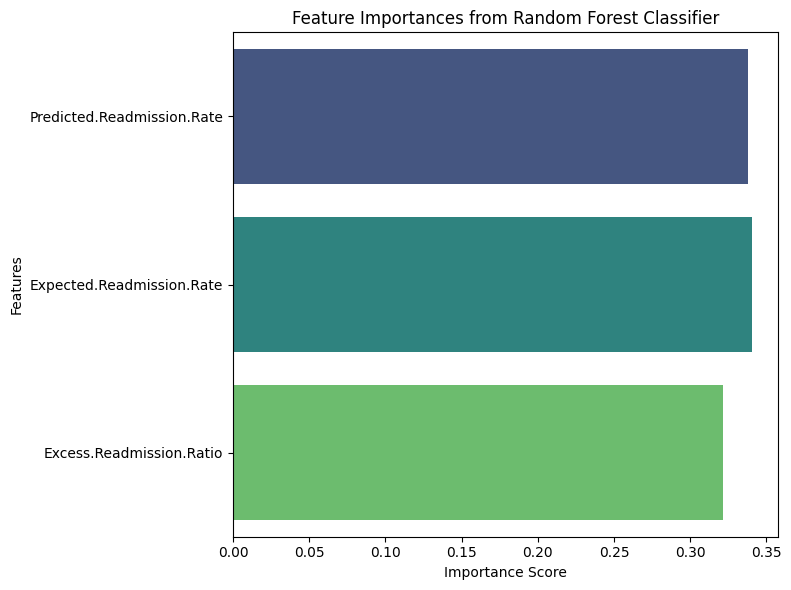

In [ ]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print("\nFeature Importances:")
print(feature_importances)

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title('Feature Importances from Random Forest Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

The classification model uses a Random Forest to predict whether a hospital's health equity score is above or below 3
based on readmission-related metrics. The confusion matrix and classification report provide insights into model accuracy,
precision, and recall. Feature importance highlights which metrics (e.g., Predicted Readmission Rate or Excess Readmission Ratio)
contribute most to the predictions, enabling targeted interventions to improve equity and reduce disparities.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix:
[[104482      0]
 [ 98838      0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68    104482
           1       0.00      0.00      0.00     98838

    accuracy                           0.51    203320
   macro avg       0.26      0.50      0.34    203320
weighted avg       0.26      0.51      0.35    203320


Accuracy Score: 0.5139


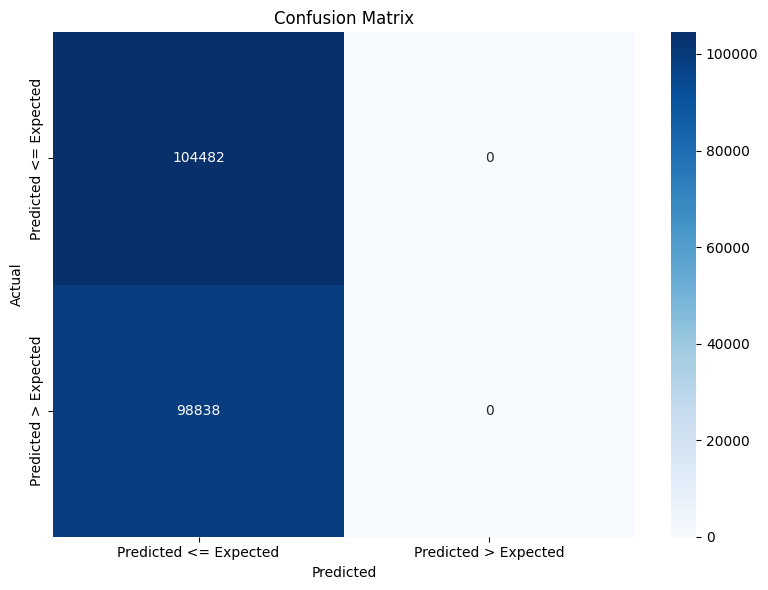

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

relevant_columns = ['Score', 'Predicted.Readmission.Rate', 'Expected.Readmission.Rate', 'Excess.Readmission.Ratio']
df_cleaned = df[relevant_columns].dropna()
df_cleaned['Score'] = pd.to_numeric(df_cleaned['Score'], errors='coerce')
df_cleaned['Score_Binary'] = df_cleaned['Score'].apply(lambda x: 1 if x > 3 else 0)

X = df_cleaned[['Score_Binary']]
y = (df_cleaned['Predicted.Readmission.Rate'] > df_cleaned['Expected.Readmission.Rate']).astype(int)

logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X, y)

y_pred = logistic_model.predict(X)

conf_matrix = confusion_matrix(y, y_pred)
class_report = classification_report(y, y_pred)
accuracy = accuracy_score(y, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

print(f"\nAccuracy Score: {accuracy:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted <= Expected', 'Predicted > Expected'],
            yticklabels=['Predicted <= Expected', 'Predicted > Expected'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression

relevant_columns = ['Score', 'Predicted.Readmission.Rate', 'Expected.Readmission.Rate', 'Excess.Readmission.Ratio']
df_cleaned = df[relevant_columns].dropna()
df_cleaned['Score'] = pd.to_numeric(df_cleaned['Score'], errors='coerce')
df_cleaned['Score_Binary'] = df_cleaned['Score'].apply(lambda x: 1 if x > 3 else 0)

X = df_cleaned[['Score_Binary']].values
y = (df_cleaned['Predicted.Readmission.Rate'] > df_cleaned['Expected.Readmission.Rate']).astype(int).values

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X, y)

class_probs = logistic_model.predict_proba([[0], [1]])

fig = go.Figure()

fig.add_trace(go.Bar(
    x=['Low Equity (0)', 'High Equity (1)'],
    y=class_probs[:, 1],
    name='Probability Predicted > Expected',
    marker=dict(color='green', opacity=0.7)
))

fig.add_trace(go.Bar(
    x=['Low Equity (0)', 'High Equity (1)'],
    y=class_probs[:, 0],
    name='Probability Predicted <= Expected',
    marker=dict(color='blue', opacity=0.7)
))

fig.update_layout(
    title='Logistic Regression Probabilities by Health Equity Class',
    xaxis_title='Health Equity (Binary: 0 = Low, 1 = High)',
    yaxis_title='Probability',
    barmode='group',
    template='plotly_white',
    legend_title='Predicted Outcomes'
)

fig.show()
